In [1]:
from model import JSNMFuP_3mod
import scvi
import scanpy as sc
import numpy as np
import anndata
import scipy.io
import torch
from scipy import sparse
import scanpy as sc
import pandas as pd

sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=100)
sc.settings.set_figure_params(dpi_save=300)

In [ ]:
X1 = sc.read('E:/GSE65364_scTrio/ALL/rna.h5ad')
X2 = sc.read('E:/GSE65364_scTrio/ALL/cnv.h5ad')
X3 = sc.read('E:/GSE65364_scTrio/ALL/met.h5ad')
R12 = sparse.load_npz('E:/GSE65364_scTrio/ALL/R1.npz')
R13 = sparse.load_npz('E:/GSE65364_scTrio/ALL/R2.npz')
R23 = sparse.load_npz('E:/GSE65364_scTrio/ALL/R3.npz')

rna = anndata.AnnData(X1.X,dtype = np.float64)
acc = anndata.AnnData(X2.X,dtype = np.float64)
met = anndata.AnnData(X3.X,dtype = np.float64)
label=np.array(rna.obs['celltype']).reshape(-1)

genes = np.array(X1.var_names)
peaks = np.array(X2.var_names)
locs = np.array(X3.var_names)

In [ ]:
test_model = mJSNMF_3mod(rna,acc,met,label,R12,R13,R23,num_c=3)
test_model.run()

In [5]:
# use S  to do clustering with louvain
clu = test_model.cluster(step = 0.001 ,start = 1)

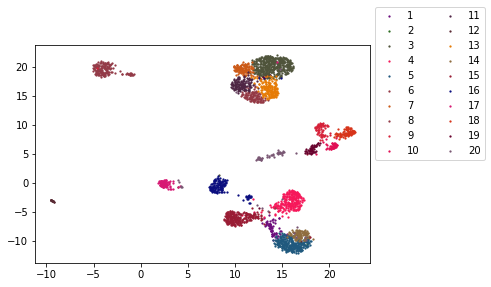

In [13]:
test_model.v_embedding(clu, min_dist = 0.68, n_neighbors=12)
test_model.v_embedding(label,min_dist = 0.68, n_neighbors=12)

In [ ]:
adata = X1
adata.obsm['umap'] = test_model.embedding
adata.obs['pred'] = clu.astype(str)
sc.pl.umap(adata, color='celltype')

In [4]:
test_model.enrich_analysis(genes)





Start writing factors for gene enrichment analysis
Successfully write factor_1 for gene enrichment analysis
Successfully write factor_2 for gene enrichment analysis
Successfully write factor_3 for gene enrichment analysis
Successfully write factor_4 for gene enrichment analysis
Successfully write factor_5 for gene enrichment analysis
Successfully write factor_6 for gene enrichment analysis
Successfully write factor_7 for gene enrichment analysis
Successfully write factor_8 for gene enrichment analysis
Successfully write factor_9 for gene enrichment analysis
Successfully write factor_10 for gene enrichment analysis
Successfully write factor_11 for gene enrichment analysis
Successfully write factor_12 for gene enrichment analysis
Successfully write factor_13 for gene enrichment analysis
Successfully write factor_14 for gene enrichment analysis
Successfully write factor_15 for gene enrichment analysis
Successfully write factor_16 for gene enrichment analysis
Successfully write factor_17 f